In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import itertools

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
# import jax.random as random
# from jax import vmap

In [3]:
# from resource_environment import Bandit_Resource_Environment
from decay_and_recovery_environment import DandR_Environment

In [92]:
npr.seed(2)

In [93]:
npr.normal(loc=0.65,scale=0.15,size=10)

array([0.58748632, 0.64155998, 0.32957059, 0.89604062, 0.38098466,
       0.5237379 , 0.72543221, 0.46320679, 0.49130717, 0.51364886])

In [19]:
# env = Bandit_Resource_Environment(random_state=1234,num_users=1000,bin_values=[1.0,1.0,1.0],tot_init_items=300,num_bins=3)
env = DandR_Environment(num_arms=3,init_values=[0.65,0.45,0.55],decay_rate=0.2,recovery_rate=0.1)

In [22]:
env.fit_BLR(init=True)

/Users/taylor/Research/ML4H/nonstationary_contextual_bandits/decay_and_recovery_environment.py:76: RuntimeWarning: overflow encountered in exp
  return self.q * (w - self.m) + (-1) * np.array([y[j] *  X[j] / (1. + np.exp(y[j] * w.dot(X[j]))) for j in range(y.shape[0])]).sum(axis=0)


In [39]:
test_idx = npr.choice(np.arange(len(env.batch)))
X_test = env.batch[test_idx][:6]
# X_test = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
X_test, env.batch[test_idx][-2:]

([1.0, 0.0, 6.0, 0.28, 0.34, 0.38], [0, 0])

In [40]:
probs = env.predict_arms(X_test)
probs

array([0.33340769, 0.33318463, 0.33340768])

In [41]:
np.argmax(probs)

0

In [42]:
env.arm_probs

array([0.65, 0.45, 0.55])

In [104]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_50fitfreq_fastdecay_fastrecovery_20191230-161456.npy')
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_fastdecay_fastrecovery_20191230-161856.npy')

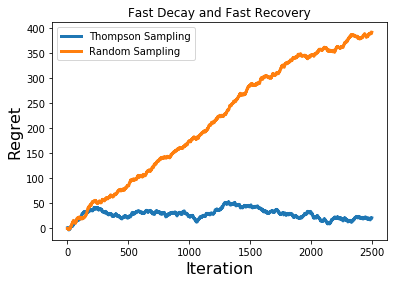

In [107]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Fast Decay and Fast Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()


In [111]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_100fitfreq_fastdecay_slowrecovery_20191230-164535.npy')
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_fastdecay_slowrecovery_20191230-164628.npy')

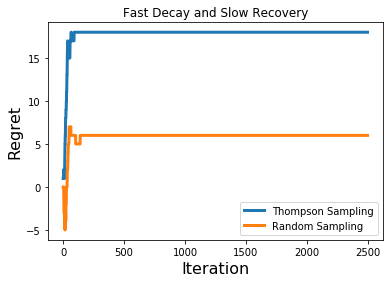

In [112]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Fast Decay and Slow Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()

In [113]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_100fitfreq_slowdecay_slowrecovery_20191230-165002.npy')
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_slowdecay_slowrecovery_20191230-165033.npy')

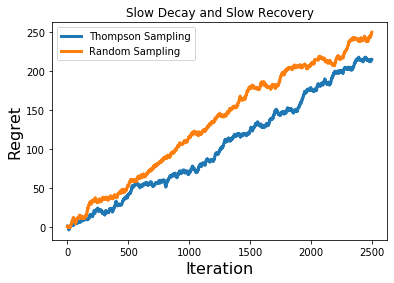

In [114]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Slow Decay and Slow Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()

In [115]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_100fitfreq_slowdecay_fastrecovery_20191230-165100.npy')
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_slowdecay_fastrecovery_20191230-165118.npy')

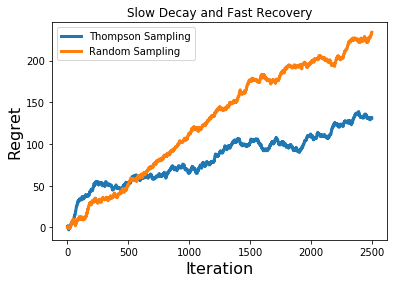

In [116]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Slow Decay and Fast Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()

## 10 Armed experiments

In [ ]:
rand_decay = np.load('regrets/regret_decay_random_10arms_2500iters_100fitfreq_fastdecay_fastrecovery_20191230-172055.npy')
ts_decay = np.load('regrets/regret_decay_ts_bayes_10arms_2500iters_100fitfreq_fastdecay_fastrecovery_20191230

In [ ]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Slow Decay and Fast Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()